# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style

# Files to Load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load, parse_dates=["date"])

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
ride_count_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
ride_count_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
driver_count_type = city_data_df.groupby(["type"]).sum()["driver_count"]
driver_count_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
fare_total_type = pyber_data_df.groupby(["type"]).sum()["fare"]
fare_total_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
fare_avg_type = pyber_data_df.groupby(["type"]).mean()["fare"]
fare_avg_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type.
fare_dvr_avg_type = fare_total_type / driver_count_type
fare_dvr_avg_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
PyBer_Summary_df = pd.DataFrame({"Ride Count": ride_count_type, "Driver Count": driver_count_type, "Total Fare": fare_total_type,
                                 "Average Fare": fare_avg_type, "Average Ride Fare": fare_avg_type, "Average Driver Fare": fare_dvr_avg_type})
PyBer_Summary_df.head()

,Ride Count,Driver Count,Total Fare,Average Fare,Average Ride Fare,Average Driver Fare
type,,,,,,
Rural,125,78,4327.93,34.623440,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
PyBer_Summary_df.index.name = None

In [10]:
#  8. Format the columns.
PyBer_Summary_df["Total Fare"] = PyBer_Summary_df["Total Fare"].map("${:,.2f}".format)
PyBer_Summary_df["Average Fare"] = PyBer_Summary_df["Average Fare"].map("${:.2f}".format)
PyBer_Summary_df["Average Ride Fare"] = PyBer_Summary_df["Average Ride Fare"].map("${:.2f}".format)
PyBer_Summary_df["Average Driver Fare"] = PyBer_Summary_df["Average Driver Fare"].map("${:.2f}".format)
PyBer_Summary_df.head()

,Ride Count,Driver Count,Total Fare,Average Fare,Average Ride Fare,Average Driver Fare
Rural,125,78,"$4,327.93",$34.62,$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_fares_date = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
pyber_fares_date_df = pd.DataFrame(pyber_fares_date)
pyber_fares_date_df.head()

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_fares_date_df = pyber_fares_date_df.reset_index()
pyber_fares_date_df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_fares_date_df = pyber_fares_date_df.pivot(index="date", columns="type", values="fare")
pyber_fares_date_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

pyber_fares_dateset_df = pyber_fares_date_df.loc['2019-01-01':'2019-04-29']
pyber_fares_dateset_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pyber_fares_dateset_df.index = pd.to_datetime(pyber_fares_dateset_df.index)
pyber_fares_dateset_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_fares_dateset_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2218 entries, 2019-01-01 00:08:16 to 2019-04-29 23:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  579 non-null    float64
 2   Urban     1523 non-null   float64
dtypes: float64(3)
memory usage: 69.3 KB


In [67]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
result = pyber_fares_dateset_df.resample("W").sum()
result

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


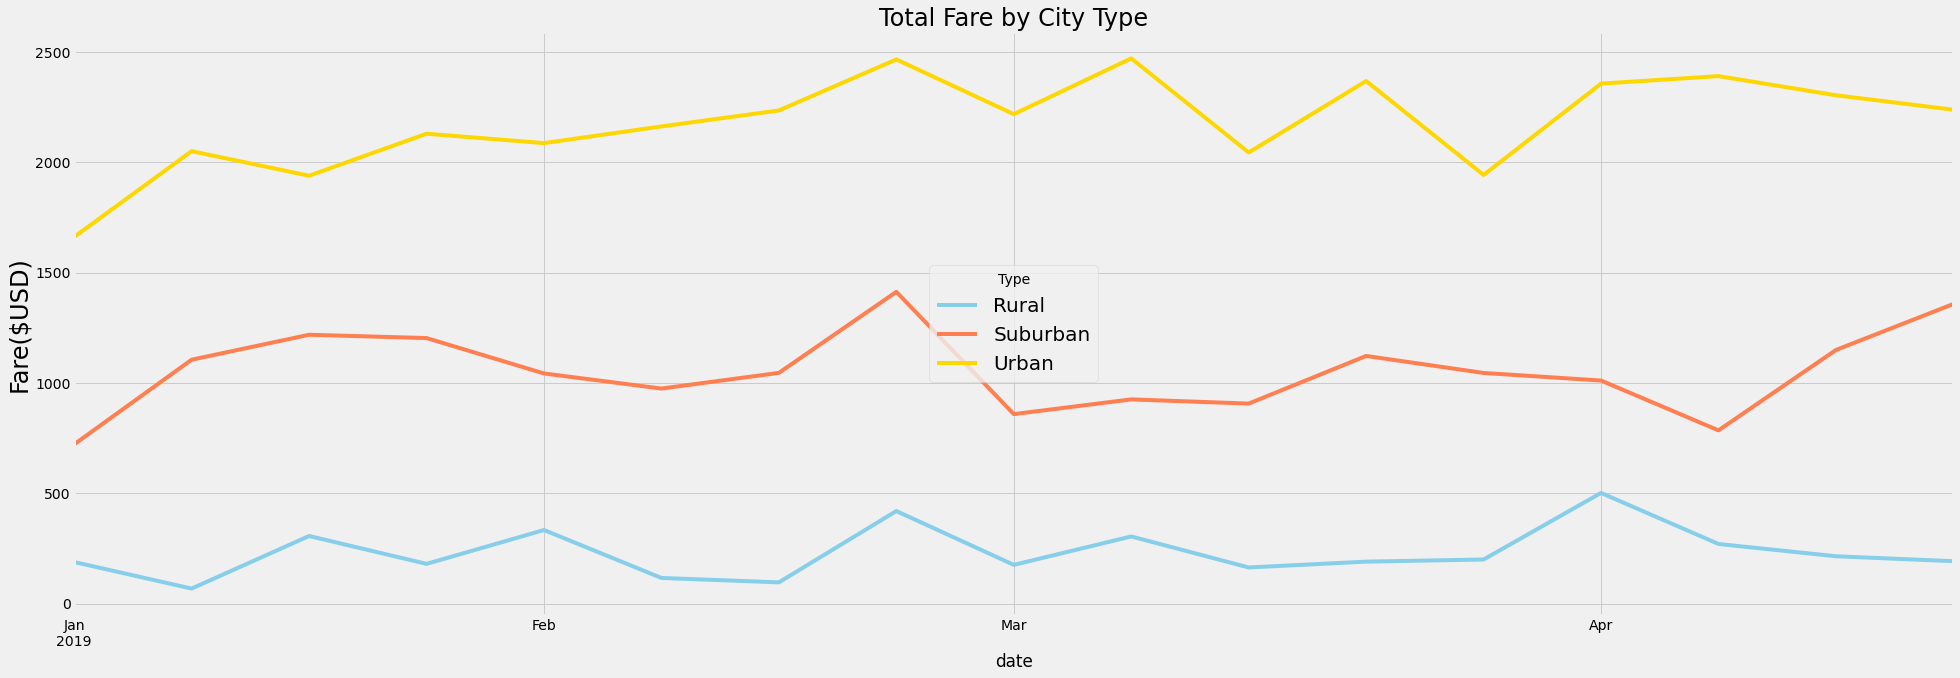

In [102]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(30, 10))
ax = result.plot(ax=ax, color=['skyblue','coral','gold'])
ax.set_xlim("2019-01-01", "2019-04-28")
ax.set_ylabel('Fare($USD)', fontsize=24)
ax.set_title('Total Fare by City Type', fontsize=24)
ax.legend(loc="center", title="Type", fontsize="20")
# Save Figure
plt.savefig("analysis/Fig8.png")